In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
df = pd.read_excel('Adops & Data Scientist Sample Data.xlsx',header = None) 
df.rename(columns={0:'x1',1:'x2',2:'y'}, inplace=True)

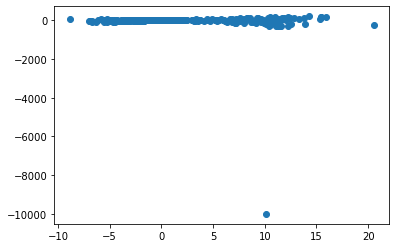

In [106]:
plt.scatter(df.x1,df.y)
df = df[(df.x1>-7) & (df.x1<20)& (df.y>-2000)]
## Remove outlier

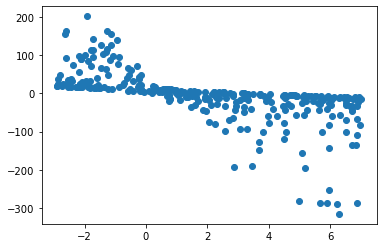

In [107]:
plt.scatter(df.x2,df.y)

In [108]:
## Normalization
df = (df - df.mean())/df.std()

In [109]:
## Add interaction term
df['x1*x2'] = df.x1 * df.x2
df = df[["x1", "x2", "x1*x2","y"]]

In [110]:
X = df.iloc[:,0:3]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
y = df.iloc[:,3:4].values 
w = np.zeros([1,4])

#set hyper parameters
alpha = 0.01
iters = 1000

def computeCost(X,y,w):
    tobesummed = np.power(((X @ w.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

def gradientDescent(X,y,w,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        w = w - (alpha/len(X)) * np.sum(X * (X @ w.T - y), axis=0)
        cost[i] = computeCost(X, y, w)
    
    return w,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,w,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

## The final result is y = -0.122 - 0.205*x1 - 0.695*x2 - -0.616*x1*x2

[[-0.12229585 -0.20525232 -0.69457617 -0.61551152]]
0.12474755226210428


Text(0.5, 1.0, 'Error vs. Training Epoch')

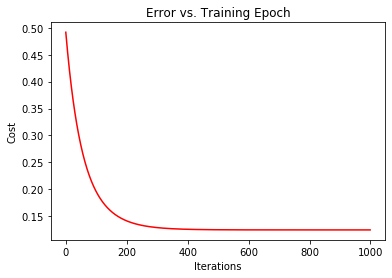

In [111]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [112]:
## Calculate R square
from statistics import mean
def predict (row):
    prediction = g[0][0] + g[0][1] * row['x1'] + g[0][2] * row['x2'] + g[0][3] * row['x1*x2']
    return prediction
df['y_hat'] = df.apply(lambda x:predict(x),axis = 1)
def squared_error(ys_orig,ys_line):
    return sum([(x-y)**2 for x,y in zip(ys_orig,ys_line)])

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

y = df.y.tolist()
y_hat = df.y_hat.tolist()
coefficient_of_determination(y,y_hat)

0.7496620066091556

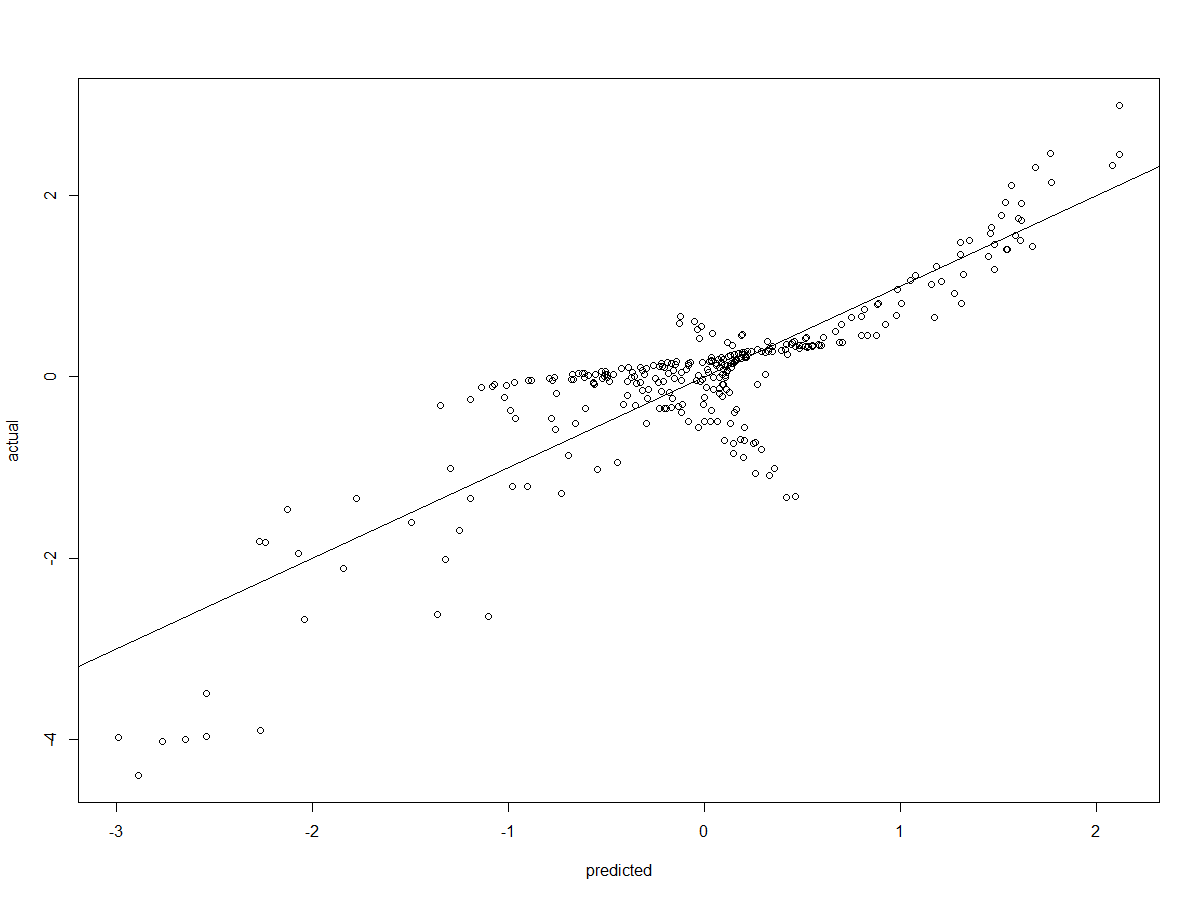